# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [60]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Importing data

In [61]:
# url string that hosts our .csv file
absoluteRoute = "/Users/benjaminortiz/Documents/GitHub/TC1002S/NotebooksStudents/A01277673/SecondClass/"

iris = load_iris()
# Read the .csv file and store it as a pandas Data Frame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species as a column for easier grouping
df['Class'] = iris.target_names[iris.target]




# Exploring the content of the data set

Get a general 'feel' of the data


In [62]:
#Printing the head and some statistics
print(df.head(5))

print(df.describe())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    Class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [63]:
# Number of times that each distinct value of a variable occurs in a data set
df.value_counts(df["Class"])


Class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [64]:
# Proportion of each distinct value of a variable occurs in a data set
class_counts = df['Class'].value_counts()

# Get the count for 'Iris-versicolor'
print("Proportion of Iris-versicolor: ", class_counts['versicolor']/len(df))
print("Proportion of Iris-virginica: ", class_counts['virginica']/len(df))
print("Proportion of Iris-setosa: ", class_counts['setosa']/len(df))




Proportion of Iris-versicolor:  0.3333333333333333
Proportion of Iris-virginica:  0.3333333333333333
Proportion of Iris-setosa:  0.3333333333333333


Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [65]:
# Total number of observations
notNullOb = df.notnull().sum()
print(notNullOb)

# Total number of null observations
nullOb = df.isnull().sum()
print(nullOb)

# Total number of counts (excluding missing values)
print(notNullOb)




sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Class                150
dtype: int64
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64
sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
Class                150
dtype: int64


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

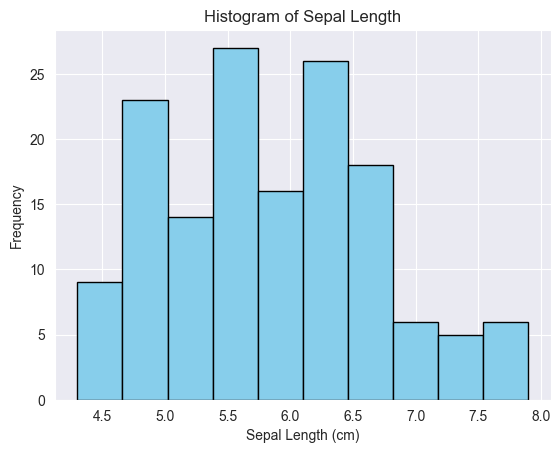

In [66]:
# Plot histogram of Sepal Length only
plt.hist(df['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

plt.show()


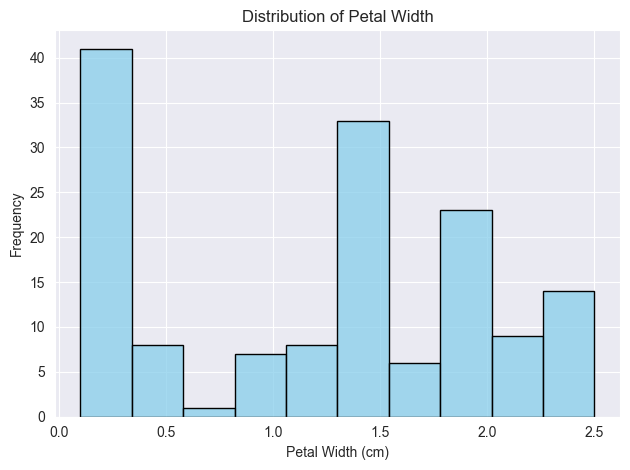

In [67]:
# Plot distribution of the petal width only
fig, ax = plt.subplots()
sns.histplot(df["petal width (cm)"], bins=10, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Petal Width')
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


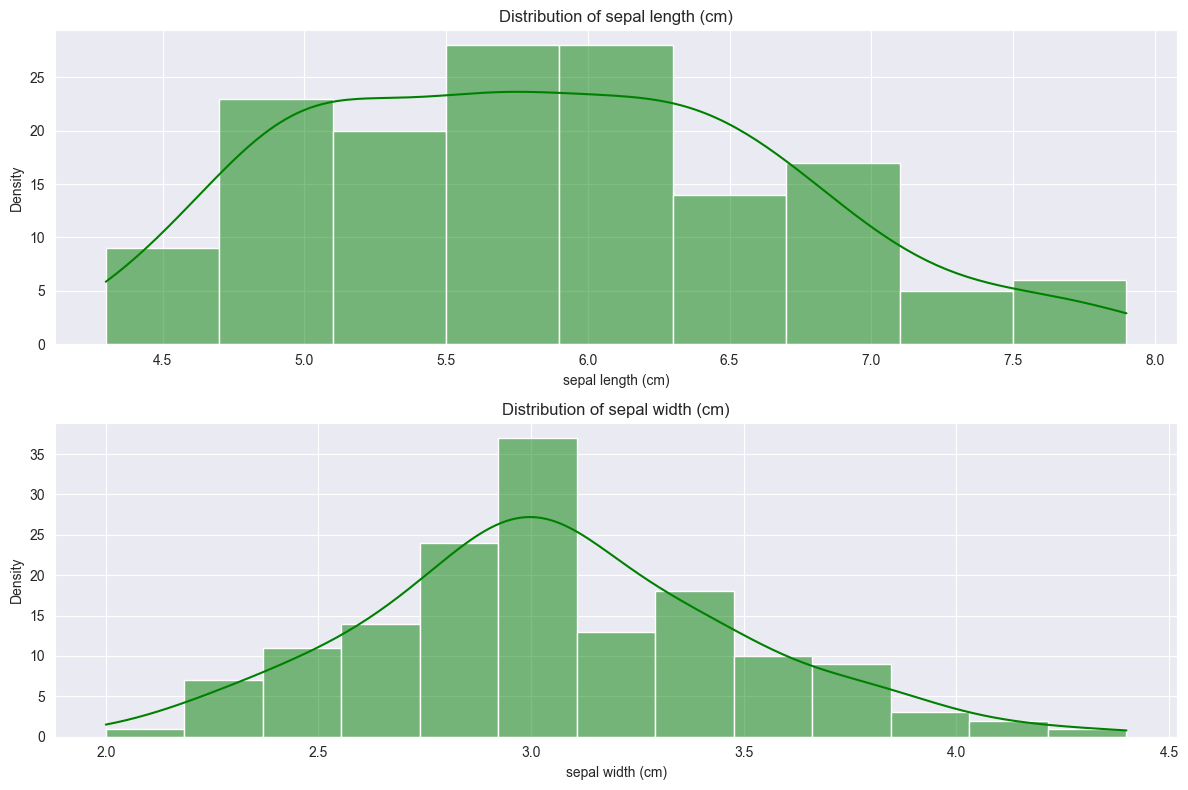

In [68]:
# Plot histogram of both the sepal length (cm) and the sepal width (cm)
fig, axes = plt.subplots(2, figsize=(12, 8))

# List of features to plot
features = ['sepal length (cm)', 'sepal width (cm)']

for feature, ax in zip(features, axes.flatten()):
    sns.histplot(df[feature], kde=True, ax=ax, color='green')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

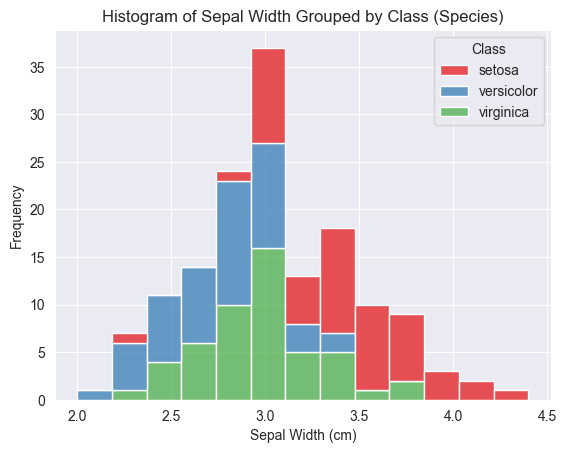

In [69]:
# Create a histogram of the "sepal width (cm)" grouped by "Class"

# Plot histograms of 'sepal width (cm)' grouped by 'Class'
sns.histplot(data=df, x='sepal width (cm)', hue='Class', multiple='stack', palette='Set1')

plt.title('Histogram of Sepal Width Grouped by Class (Species)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()



# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

Text(0, 0.5, 'Sepal Width (cm)')

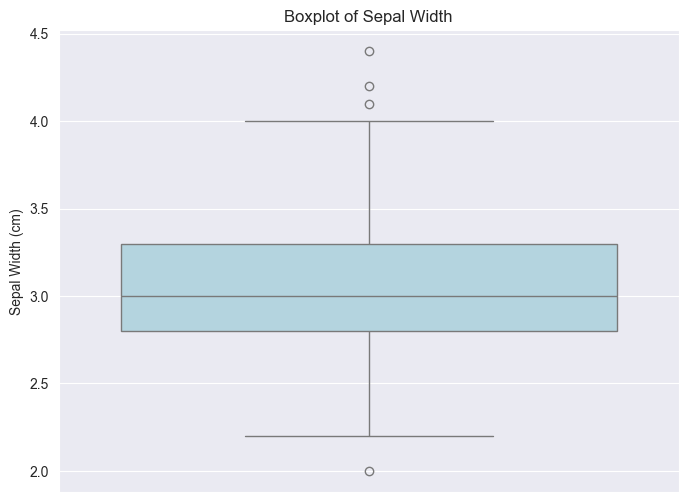

In [70]:
# Create the boxplot of the "sepal width" amounts
plt.figure(figsize=(8, 6))
sns.boxplot(y='sepal width (cm)', data=df, color='lightblue')

plt.title('Boxplot of Sepal Width')
plt.ylabel('Sepal Width (cm)')


Text(0, 0.5, 'Sepal Length (cm)')

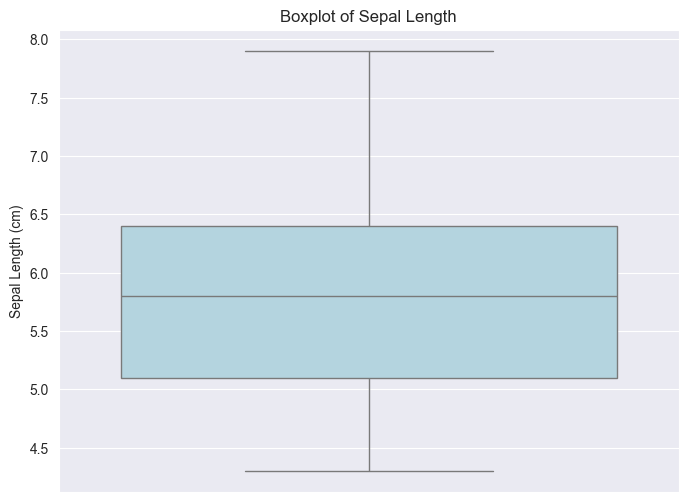

In [71]:
# Create the boxplots of the "sepal length" amounts
plt.figure(figsize=(8, 6))
sns.boxplot(y='sepal length (cm)', data=df, color='lightblue')

plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length (cm)')


Text(0, 0.5, 'Sepal Width (cm)')

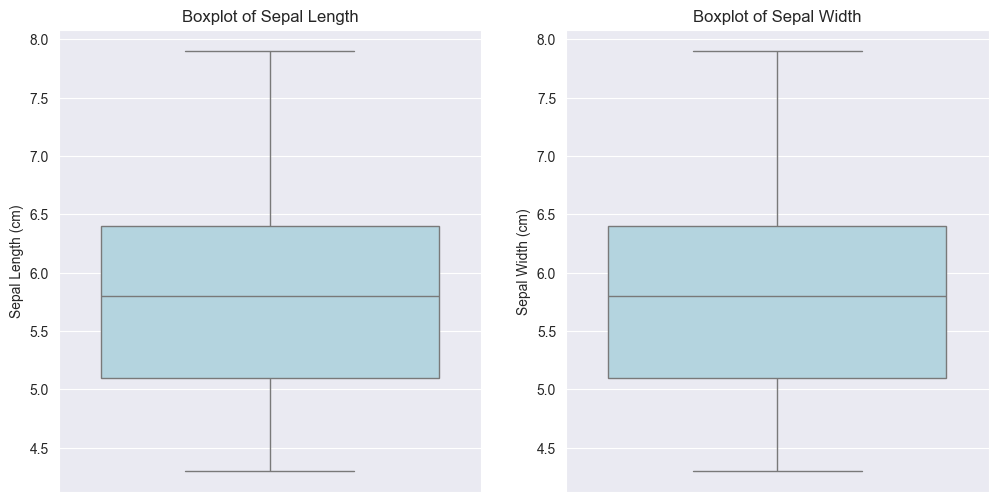

In [72]:
# Create the boxplots of the "sepal width" and of the "sepal length" amounts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='sepal length (cm)', data=df, color='lightblue')

plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(y='sepal length (cm)', data=df, color='lightblue')

plt.title('Boxplot of Sepal Width')
plt.ylabel('Sepal Width (cm)')


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

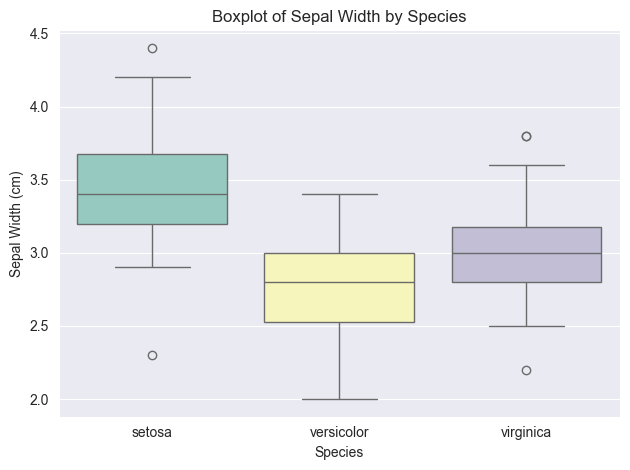

In [73]:
# Create side-by-side boxplots of the "sepal width" grouped by "Gender"

sns.boxplot(x='Class', y='sepal width (cm)', data=df, hue="Class",palette='Set3')
plt.title('Boxplot of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


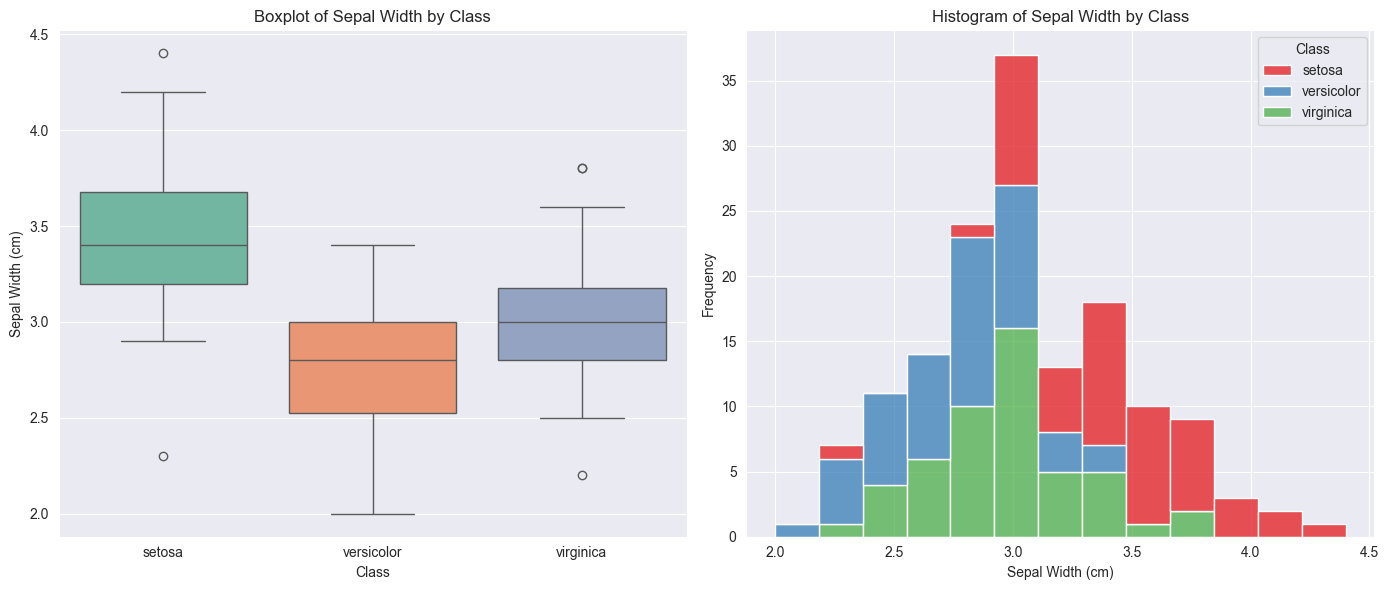

In [74]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
plt.figure(figsize=(14, 6))

# Boxplot for 'sepal width (cm)' grouped by 'Class'
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='sepal width (cm)', data=df, hue="Class",palette='Set2')
plt.title('Boxplot of Sepal Width by Class')
plt.xlabel('Class')
plt.ylabel('Sepal Width (cm)')

# Histogram for 'sepal width (cm)' grouped by 'Class'
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='sepal width (cm)', hue='Class', multiple='stack',palette='Set1')
plt.title('Histogram of Sepal Width by Class')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

Text(0, 0.5, 'Sepal Width (cm)')

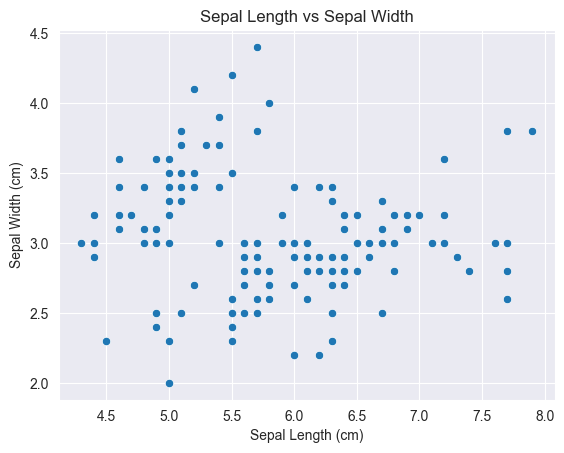

In [75]:
# scatter plot between two variables
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')


Text(0, 0.5, 'Sepal Length (cm)')

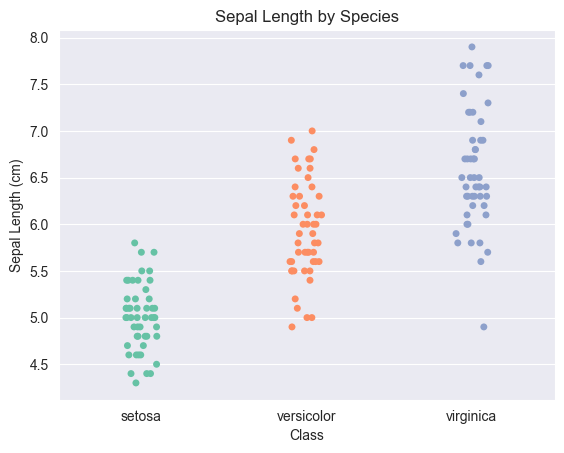

In [76]:
# scatter plot between two variables (one categorical)
sns.stripplot(x='Class', y='sepal length (cm)', data=df, hue="Class" ,jitter=True, palette='Set2')
plt.title('Sepal Length by Species')
plt.xlabel('Class')
plt.ylabel('Sepal Length (cm)')


Text(0, 0.5, 'Petal Length (cm)')

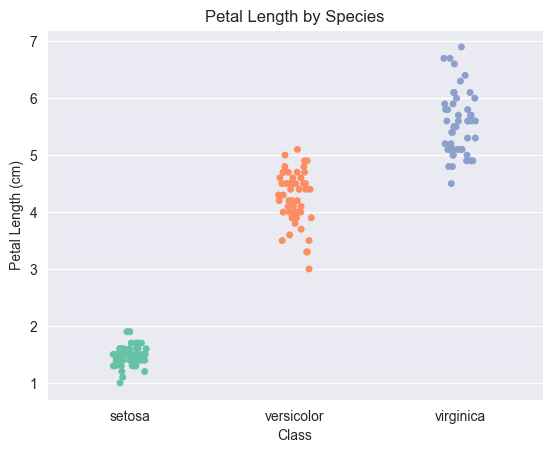

In [77]:
# scatter plot between two variables (one categorical)
sns.stripplot(x='Class', y='petal length (cm)', data=df, hue="Class" ,jitter=True, palette='Set2')
plt.title('Petal Length by Species')
plt.xlabel('Class')
plt.ylabel('Petal Length (cm)')



Text(0, 0.5, 'Sepal Width (cm)')

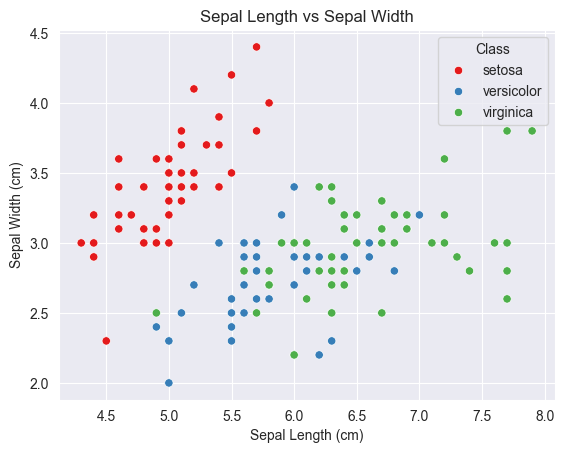

In [78]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Class', data=df, palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')


Text(0, 0.5, 'Petal Width (cm)')

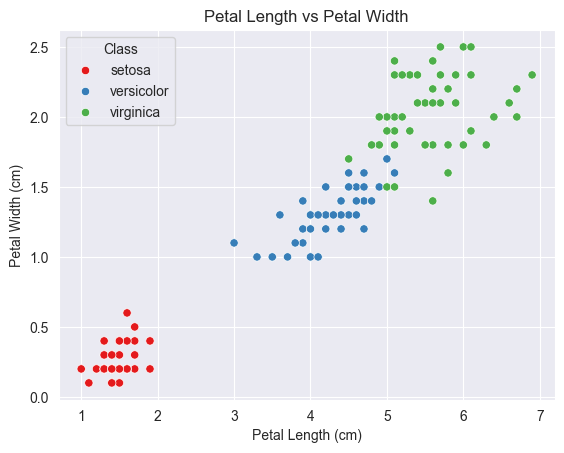

In [81]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='Class', data=df, palette='Set1')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')


# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the boxplots for each of the quantitative variables


3. Plot the boxplots of the petal width grouped by type of flower


4. Plot the boxplots of the setal length grouped by type of flower


5. Provide a description (explaination from your observations) of each of the quantitative variables


1.

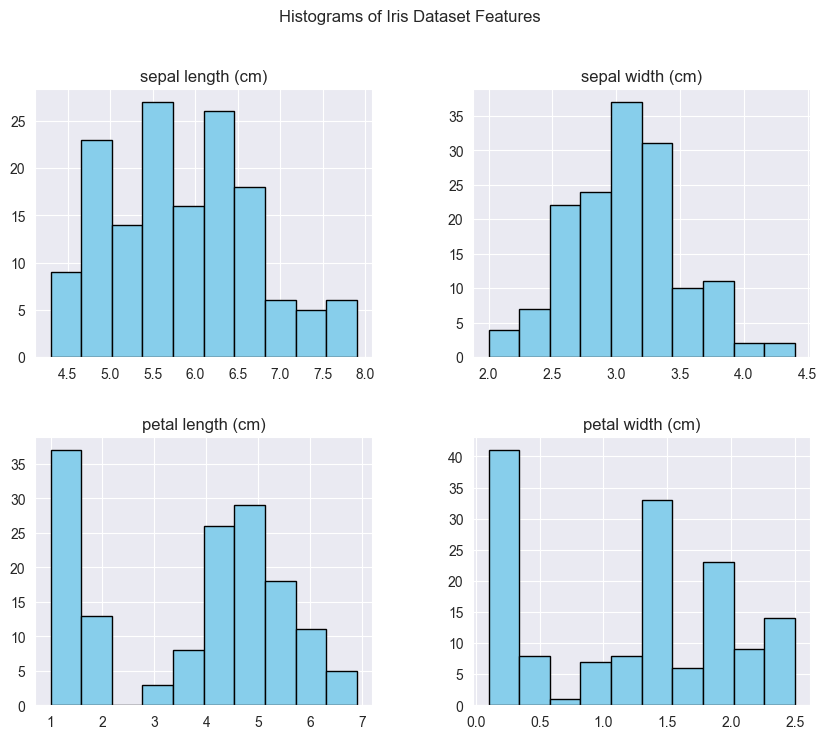

In [83]:
df.hist(bins=10, figsize=(10, 8), color='skyblue', edgecolor='black')

# Add title
plt.suptitle('Histograms of Iris Dataset Features')

# Show the plot
plt.show()

2.

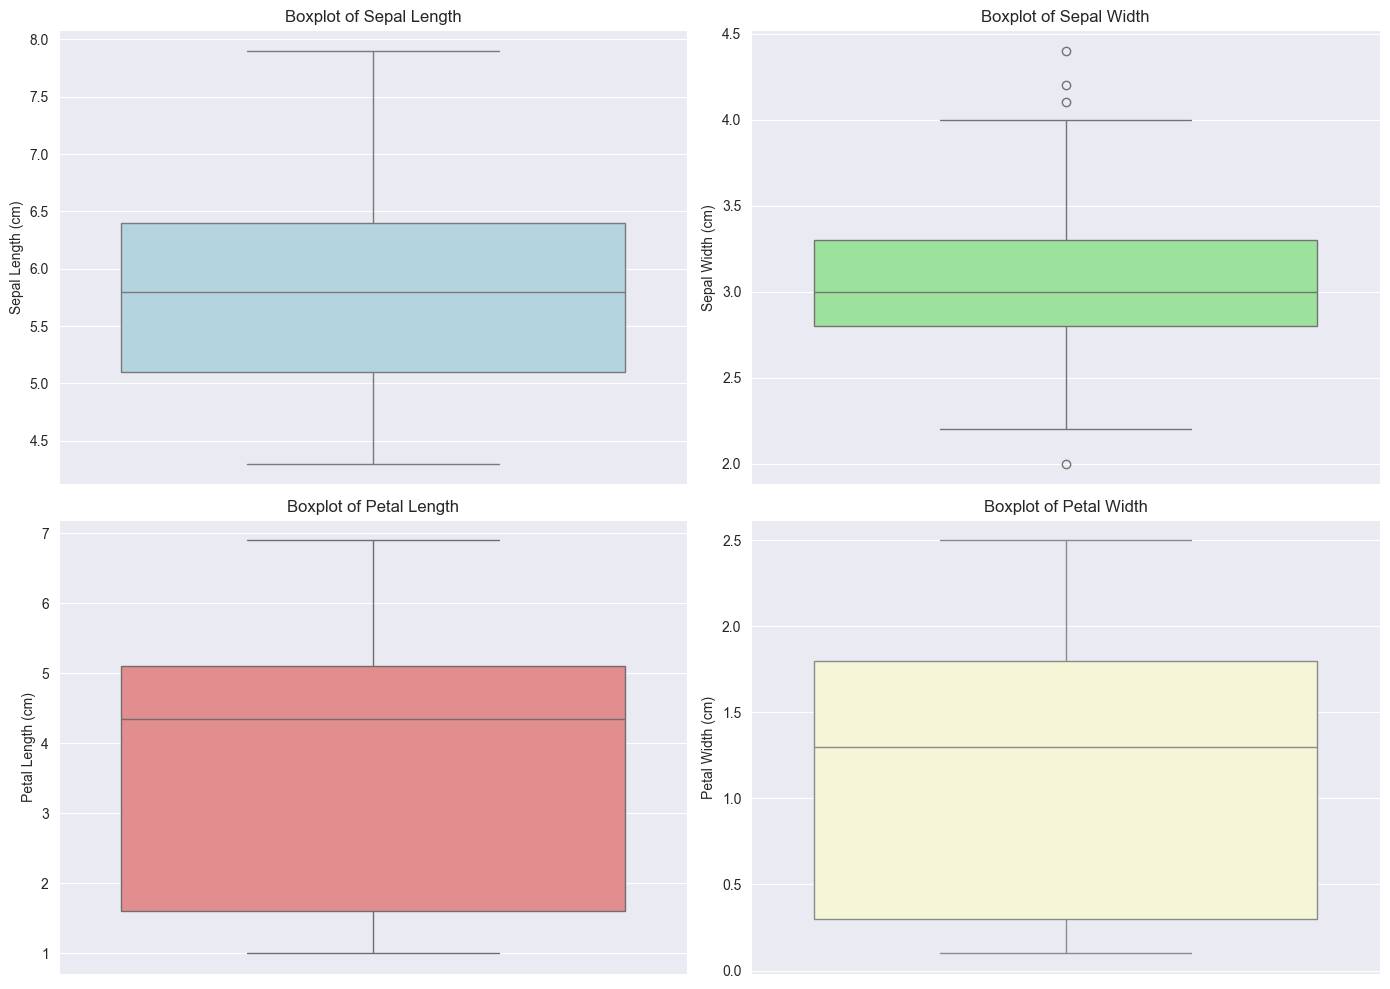

In [87]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['sepal length (cm)'], color='lightblue')
plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length (cm)')

# Boxplot for Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(y=df['sepal width (cm)'], color='lightgreen')
plt.title('Boxplot of Sepal Width')
plt.ylabel('Sepal Width (cm)')

# Boxplot for Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(y=df['petal length (cm)'], color='lightcoral')
plt.title('Boxplot of Petal Length')
plt.ylabel('Petal Length (cm)')

# Boxplot for Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(y=df['petal width (cm)'], color='lightgoldenrodyellow')
plt.title('Boxplot of Petal Width')
plt.ylabel('Petal Width (cm)')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

3.

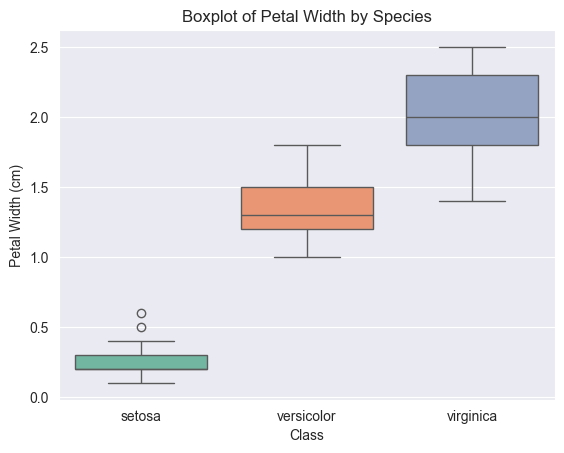

In [86]:
#Boxplot of petal width grouped by class
sns.boxplot(x='Class', y='petal width (cm)', data=df, hue="Class",palette='Set2')
plt.title('Boxplot of Petal Width by Species')
plt.xlabel('Class')
plt.ylabel('Petal Width (cm)')

# Show the plot
plt.show()

4.

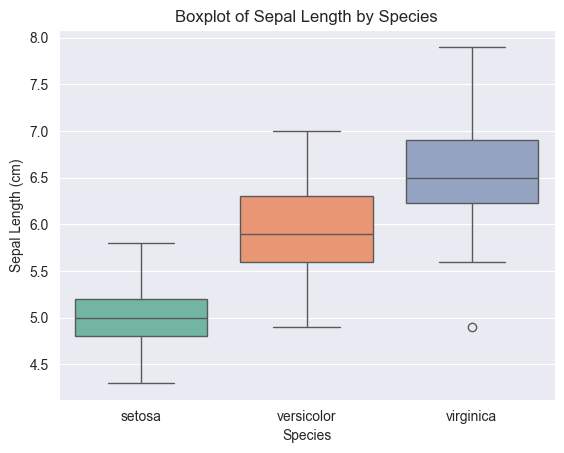

In [90]:
#Box plot of sepal length grouped by class
sns.boxplot(x='Class', y='sepal length (cm)', data=df, hue="Class",palette='Set2')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

plt.show()

5. Provide a description (explanation from your observations) of each of the quantitative variables

    1. Sepal Length<br><br>
        Boxplot interpretation
            <br><br>
            1. The median sepal length is around 5.8 cm.
            <br><br>
            2. The interquartile range (IQR) is from approximately 5.1 to 6.4 cm, indicating that the middle 50% of the data falls within this range.
            <br><br>
            3. There are a few outliers on the higher end, suggesting some flowers have unusually long sepals.
                <br><br>
        Histogram interpretation
            <br><br>
            The data appears to be normally distributed, with most values falling between 5.0 and 6.0 centimeters. This indicates that the majority of iris flowers in the dataset have sepal lengths within this range. <br><br>
    2. Sepal Width
        Boxplot interpretation<br><br>
           1. The median sepal width is around 3.0 cm. <br><br>
           2. The IQR is from about 2.7 to 3.3 cm. <br><br>
           3. There are several outliers on both the lower and higher ends, indicating variability in sepal width among the flowers.<br><br>        
        Histogram interpretation
            <br><br>
            The distribution is slightly skewed to the right, with a peak around 3.0 centimeters. Most values are concentrated between 2.5 and 3.5 centimeters, this is a common range for sepal width.<br><br>
   
    3. Petal length
        <br><br>
        Boxplot interpretation <br><br>
           1. The median petal length is around 4.3 cm.<br><br>
           2. The IQR ranges from approximately 1.5 to 5.1 cm, showing a wider spread in the middle 50% of the data.<br><br>
           3. There are significant outliers on the lower end, suggesting some flowers have much shorter petals.<br><br>
        <br><br>
        Histogram interpretation
           <br><br>
            The histograms shows two peaks: one around 1 to 1.5 centimeters and another around 4 to 5 centimeters. This indicates the presence of two distinct groups within the dataset.<br><br>
    4. Petal width<br><br>
        Boxplot interpretation <br><br>
           1. The median petal width is around 1.3 cm. <br><br>
           2. There are several outliers on the lower end, indicating some flowers have very narrow petals. <br><br>
    
        Histogram interpretation
            Similar to petal length, his histogram also shows a bimodal distribution. Peaks are observed near 0.2 to 0.3 centimeters and another just below 2 centimeters.<br><br>